In [4]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
import scipy.stats as st
from scipy.stats import linregress


In [5]:
# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [6]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

647

In [7]:
city_name_list = []
cloudiness_list = []
country_list = []
date_list = []
humidity_list = []
lat_list = []
lng_list = []
max_temp_list = []
wind_speed_list = []
index_counter = 0
set_counter = 1

In [8]:
print("Beginning Data Retrieval ")
print("-----------------------------")

base_url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query_url = f"{base_url}appid={weather_api_key}&units={units}&q="


# For each city name in cities list, do below things...
for index, city in enumerate(cities, start = 1):
    try:
        response = requests.get(query_url + city).json()
        city_name_list.append(response["name"])
        cloudiness_list.append(response["clouds"]["all"])
        country_list.append(response["sys"]["country"])
        date_list.append(response["dt"])
        humidity_list.append(response["main"]["humidity"])
        lat_list.append(response["coord"]["lat"])
        lng_list.append(response["coord"]["lon"])
        max_temp_list.append(response['main']['temp_max'])
        wind_speed_list.append(response["wind"]["speed"])
        if index_counter > 49:
            index_counter = 0
            set_counter = set_counter + 1
    
        else:
            index_counter = index_counter + 1
            
        print(f"Processing Record {index_counter} of Set {set_counter} : {city}") 
  
    except(KeyError, IndexError):
        print("City not found. Skipping...")

print("-----------------------------")
print("Data Retrieval Complete")
print("-----------------------------")

Beginning Data Retrieval 
-----------------------------
City not found. Skipping...
Processing Record 1 of Set 1 : mozarlandia
City not found. Skipping...
Processing Record 2 of Set 1 : albany
Processing Record 3 of Set 1 : yellowknife
Processing Record 4 of Set 1 : hithadhoo
Processing Record 5 of Set 1 : avarua
Processing Record 6 of Set 1 : rikitea
Processing Record 7 of Set 1 : sao joao da barra
Processing Record 8 of Set 1 : lasa
Processing Record 9 of Set 1 : venado tuerto
Processing Record 10 of Set 1 : cape town
Processing Record 11 of Set 1 : pontianak
Processing Record 12 of Set 1 : cabangahan
Processing Record 13 of Set 1 : bluff
Processing Record 14 of Set 1 : hermanus
Processing Record 15 of Set 1 : ilulissat
Processing Record 16 of Set 1 : kaitangata
Processing Record 17 of Set 1 : hobart
Processing Record 18 of Set 1 : nikolskoye
Processing Record 19 of Set 1 : mecca
Processing Record 20 of Set 1 : barabai
Processing Record 21 of Set 1 : chokurdakh
Processing Record 22 o

Processing Record 35 of Set 4 : fortuna
Processing Record 36 of Set 4 : avera
Processing Record 37 of Set 4 : progreso
City not found. Skipping...
City not found. Skipping...
Processing Record 38 of Set 4 : victoria point
Processing Record 39 of Set 4 : coihaique
Processing Record 40 of Set 4 : dukat
Processing Record 41 of Set 4 : coquimbo
Processing Record 42 of Set 4 : college
Processing Record 43 of Set 4 : pangkalanbuun
Processing Record 44 of Set 4 : mount gambier
Processing Record 45 of Set 4 : belyy yar
Processing Record 46 of Set 4 : motygino
Processing Record 47 of Set 4 : barsovo
Processing Record 48 of Set 4 : boddam
Processing Record 49 of Set 4 : nemuro
Processing Record 50 of Set 4 : griffith
Processing Record 0 of Set 5 : klaksvik
Processing Record 1 of Set 5 : sohag
Processing Record 2 of Set 5 : provideniya
Processing Record 3 of Set 5 : visnes
City not found. Skipping...
Processing Record 4 of Set 5 : abha
Processing Record 5 of Set 5 : talnakh
Processing Record 6 of

Processing Record 22 of Set 8 : dondo
Processing Record 23 of Set 8 : salinopolis
Processing Record 24 of Set 8 : tecoanapa
City not found. Skipping...
Processing Record 25 of Set 8 : san ramon
City not found. Skipping...
Processing Record 26 of Set 8 : najran
Processing Record 27 of Set 8 : duluth
Processing Record 28 of Set 8 : penzance
City not found. Skipping...
Processing Record 29 of Set 8 : korla
Processing Record 30 of Set 8 : price
Processing Record 31 of Set 8 : kilrush
Processing Record 32 of Set 8 : severo-yeniseyskiy
Processing Record 33 of Set 8 : marsa matruh
Processing Record 34 of Set 8 : san carlos
Processing Record 35 of Set 8 : ulladulla
Processing Record 36 of Set 8 : las vegas
Processing Record 37 of Set 8 : lazaro cardenas
City not found. Skipping...
Processing Record 38 of Set 8 : geraldton
Processing Record 39 of Set 8 : satipo
Processing Record 40 of Set 8 : umm kaddadah
Processing Record 41 of Set 8 : zomin
Processing Record 42 of Set 8 : pombas
Processing Re

Processing Record 1 of Set 12 : fort nelson
Processing Record 2 of Set 12 : deputatskiy
Processing Record 3 of Set 12 : saryg-sep
Processing Record 4 of Set 12 : kirakira
City not found. Skipping...
Processing Record 5 of Set 12 : carutapera
Processing Record 6 of Set 12 : mana
City not found. Skipping...
Processing Record 7 of Set 12 : garissa
Processing Record 8 of Set 12 : mandalgovi
Processing Record 9 of Set 12 : hambantota
Processing Record 10 of Set 12 : nishihara
City not found. Skipping...
Processing Record 11 of Set 12 : naze
City not found. Skipping...
Processing Record 12 of Set 12 : sayyan
Processing Record 13 of Set 12 : khani
Processing Record 14 of Set 12 : kapit
Processing Record 15 of Set 12 : xining
Processing Record 16 of Set 12 : gwadar
Processing Record 17 of Set 12 : antofagasta
Processing Record 18 of Set 12 : srivardhan
Processing Record 19 of Set 12 : lakes entrance
Processing Record 20 of Set 12 : mokrous
Processing Record 21 of Set 12 : chenzhou
City not fou

In [9]:
# Create a panda data frame using data retrieved
weather_dict = pd.DataFrame({ 
                "City" : city_name_list,
                "Cloudiness" : cloudiness_list,
                "Country" : country_list,
                "Date" : date_list,
                "Humidity" : humidity_list,
                "Lat" : lat_list,
                "Lng" : lng_list,
                "Max Temp" : max_temp_list,
                "Wind Speed" : wind_speed_list
})

weather_dict.count()

City          589
Cloudiness    589
Country       589
Date          589
Humidity      589
Lat           589
Lng           589
Max Temp      589
Wind Speed    589
dtype: int64

In [8]:
weather_dict

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Coquimbo,90,CL,1593470829,93,-29.95,-71.34,55.40,8.05
1,Songkhla,75,TH,1593471168,100,6.83,100.67,73.40,2.24
2,Provideniya,40,RU,1593470989,70,64.38,-173.30,44.60,15.66
3,Henties Bay,0,NA,1593471168,86,-22.12,14.28,55.99,1.99
4,Rikitea,38,PF,1593471102,60,-23.12,-134.97,68.27,14.12
...,...,...,...,...,...,...,...,...,...
733,Zapolyarnyy,100,RU,1593471267,80,69.42,30.81,41.00,26.40
734,Itarema,39,BR,1593471013,82,-2.92,-39.92,78.01,10.89
735,Ruyigi Province,71,BI,1593471267,63,-3.45,30.32,60.44,3.04
736,Chapais,40,CA,1593471267,53,49.78,-74.85,77.00,8.05


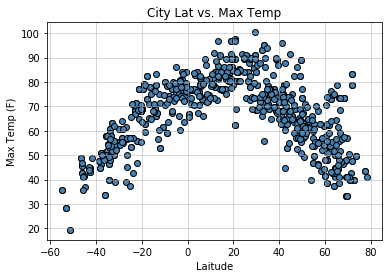

In [13]:
# Create Latitude vs. Temperature Plot scatter plot
plt.scatter(weather_dict["Lat"], weather_dict["Max Temp"], facecolor = "steelblue", edgecolor = "black")

# Set title
plt.title("City Lat vs. Max Temp")

# Set x axis label
plt.xlabel("Laitude")

# Set y axis label
plt.ylabel("Max Temp (F)")

# Set grid line
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)


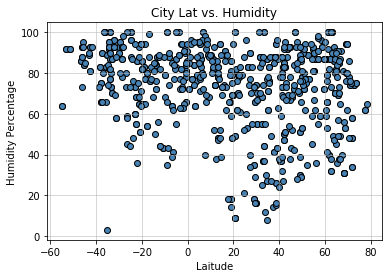

In [20]:
# Create Latitude vs. Humidity Plot scatter plot
plt.scatter(weather_dict["Lat"], weather_dict["Humidity"], facecolor = "steelblue", edgecolor = "black")

# Set title
plt.title("City Lat vs. Humidity")

# Set x axis label
plt.xlabel("Laitude")

# Set y axis label
plt.ylabel("Humidity Percentage")

# Set grid line
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)


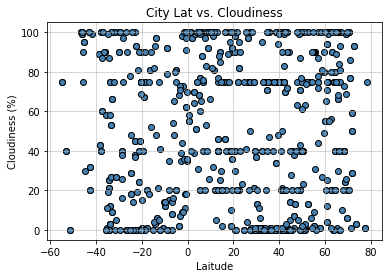

In [18]:

# Create Latitude vs. Cloudiness Plot scatter plot
plt.scatter(weather_dict["Lat"], weather_dict["Cloudiness"], facecolor = "steelblue", edgecolor = "black")

# Set title
plt.title("City Lat vs. Cloudiness")

# Set x axis label
plt.xlabel("Laitude")

# Set y axis label
plt.ylabel("Cloudiness (%)")

# Set y axis limit
plt.ylim(-5,105)

# Set grid line
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)


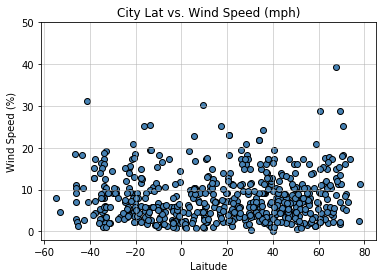

In [12]:
# Create Latitude vs. Wind Speed scatter plot
plt.scatter(weather_dict["Lat"], weather_dict["Wind Speed"], facecolor = "steelblue", edgecolor = "black")
plt.title("City Lat vs. Wind Speed (mph)")

# Set x axis label
plt.xlabel("Laitude")

# Set y axis label
plt.ylabel("Wind Speed (%)")

# Set y axis limit
plt.ylim(-2,50)

# Set grid line
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)

In [15]:
# Create Northern and Southern Hemisphere DataFrames
northern_hemisphere = weather_dict.loc[weather_dict["Lat"] >= 0]
southern_hemisphere = weather_dict.loc[weather_dict["Lat"] < 0]

def linear_agression(x,y):
    print(f"The r-squared is : {round(st.pearsonr(x, y)[0],2)}")
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    regress_values = x * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x, y)
    plt.plot(x,regress_values,"r-")
    return line_eq

# Define a fuction for annotating
def annotate(line_eq, a, b):
    plt.annotate(line_eq,(a,b),fontsize=15,color="red")

The r-squared is : -0.71


Text(0, 0.5, 'Max Temp (F)')

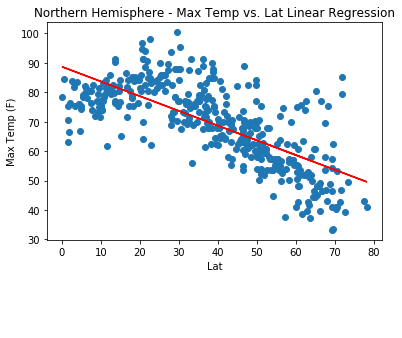

In [17]:
# Call an function #1
equation = linear_agression(northern_hemisphere["Lat"], northern_hemisphere["Max Temp"])

# Call an function #2
annotate(equation, 0, 0)

# Set a title
plt.title("Northern Hemisphere - Max Temp vs. Lat Linear Regression")

# Set xlabel
plt.xlabel("Lat")

# Set ylabel
plt.ylabel("Max Temp (F)")

The r-squared is : 0.85


Text(0, 0.5, 'Max Temp (F)')

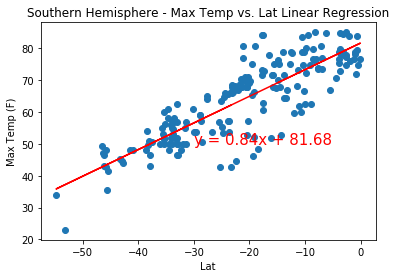

In [20]:
# Call an function #1
equation = linear_agression(southern_hemisphere["Lat"],southern_hemisphere["Max Temp"])

# Call an function #2
annotate(equation, -30, 50)

# Set a title
plt.title("Southern Hemisphere - Max Temp vs. Lat Linear Regression")

# Set xlabel
plt.xlabel("Lat")

# Set ylabel
plt.ylabel("Max Temp (F)")

The r-squared is : -0.06


Text(0, 0.5, 'Humidity')

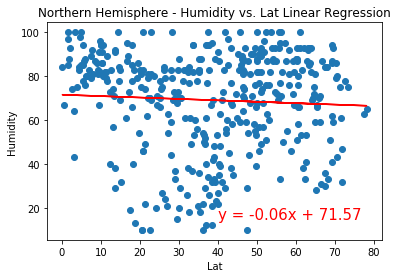

In [25]:
# Call an function #1
equation = linear_agression(northern_hemisphere["Lat"], northern_hemisphere["Humidity"])

# Call an function #2
annotate(equation, 40, 15)

# Set a title
plt.title("Northern Hemisphere - Humidity vs. Lat Linear Regression")

# Set xlabel
plt.xlabel("Lat")

# Set ylabel
plt.ylabel("Humidity")


The r-squared is : -0.14


Text(0, 0.5, 'Humidity')

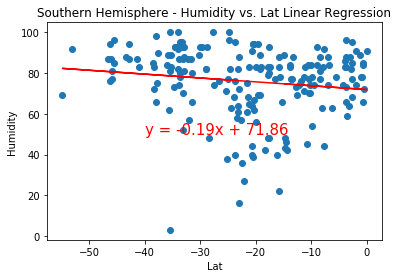

In [26]:
# Call an function #1
equation = linear_agression(southern_hemisphere["Lat"], southern_hemisphere["Humidity"])

# Call an function #2
annotate(equation, -40, 50)

# Set title
plt.title("Southern Hemisphere - Humidity vs. Lat Linear Regression")

# Set xlabel
plt.xlabel("Lat")

# Set ylabel
plt.ylabel("Humidity")

The r-squared is : -0.04


Text(0, 0.5, 'Cloudiness')

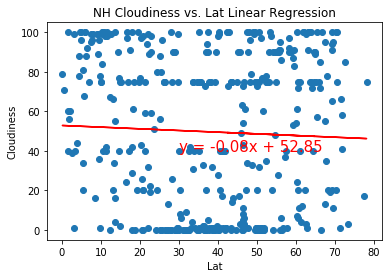

In [31]:
# Call an function #1
equation = linear_agression(northern_hemisphere["Lat"], northern_hemisphere["Cloudiness"])

# Call an function #2
annotate(equation, 30, 40)

# Set a title
plt.title("NH Cloudiness vs. Lat Linear Regression")

# Set xlabel
plt.xlabel("Lat")

# Set ylabel
plt.ylabel("Cloudiness")

The r-squared is : -0.23


Text(0, 0.5, 'Cloudiness')

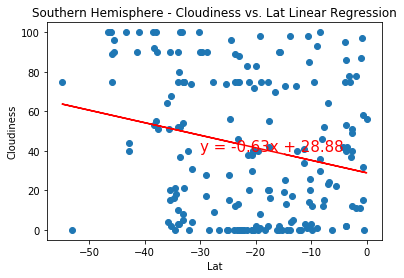

In [32]:
equation = linear_agression(southern_hemisphere["Lat"], southern_hemisphere["Cloudiness"])

# Call an function #2
annotate(equation, -30, 40)

# Set a title
plt.title("Southern Hemisphere - Cloudiness vs. Lat Linear Regression")

# Set xlabel
plt.xlabel("Lat")

# Set ylabel
plt.ylabel("Cloudiness")

The r-squared is : 0.08


Text(0, 0.5, 'Wind Speed')

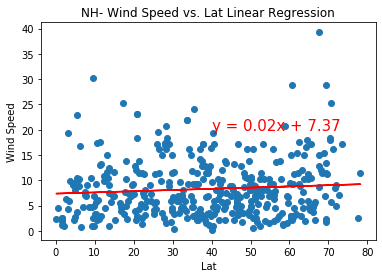

In [33]:
# Call an function #1
equation = linear_agression(northern_hemisphere["Lat"], northern_hemisphere["Wind Speed"])

# Call an function #2
annotate(equation, 40, 20)

# Set  title
plt.title("NH- Wind Speed vs. Lat Linear Regression")

# Set xlabel
plt.xlabel("Lat")

# Set ylabel
plt.ylabel("Wind Speed")

The r-squared is : -0.18


Text(0, 0.5, 'Wind Speed')

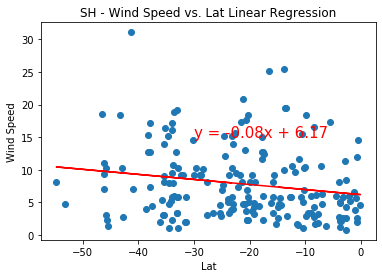

In [35]:
# Call an function #1
equation = linear_agression(southern_hemisphere["Lat"], southern_hemisphere["Wind Speed"])

# Call an function #2
annotate(equation, -30, 15)

# Set  title
plt.title("SH - Wind Speed vs. Lat Linear Regression")

# Set xlabel
plt.xlabel("Lat")

# Set ylabel
plt.ylabel("Wind Speed")